In [1]:
def prufer_to_adjacency_list(prufer):
    n = len(prufer) + 2

    # If the code is out of bounds, return a star graph
    if any(v < 1 or v > n for v in prufer) or len(Set(prufer)) == n-2:
        print("Invalid Prüfer code detected. Returning star graph.")
        center = 1
        return [[i for i in range(2, n + 1)]] + [[1] for _ in range(n - 1)]

    # Initialize degree of all vertices
    degree = [1] * n
    for v in prufer:
        degree[v - 1] += 1  # Convert to 0-indexed

    # Min-heap for leaves
    from heapq import heappush, heappop
    heap = []
    for v in range(n):
        if degree[v] == 1:
            heappush(heap, v)

    # Build adjacency list
    adjg = [[] for _ in range(n)]
    for v in prufer:
        leaf = heappop(heap)
        adjg[leaf].append(v - 1)
        adjg[v - 1].append(leaf)
        degree[leaf] -= 1
        degree[v - 1] -= 1
        if degree[v - 1] == 1:
            heappush(heap, v - 1)

    u = heappop(heap)
    v = heappop(heap)
    adjg[u].append(v)
    adjg[v].append(u)

    return adjg

def tree_from_prufer(prufer_code):
    adjg = prufer_to_adjacency_list(prufer_code)

    # Build graph
    G = Graph()
    for i, neighbors in enumerate(adjg):
        for neighbor in neighbors:
            if i < neighbor:  # Avoid duplicate edges
                G.add_edge(i + 1, neighbor + 1)  # Convert back to 1-indexed
    return G

def draw_tree_from_prufer(prufer_code):
    G = tree_from_prufer(prufer_code)
    # Print info
    print("Graph edges:")
    for edge in G.edges():
        print(f"  {edge[0]} -- {edge[1]}")
    print(f"\nNumber of vertices: {G.order()}")
    print(f"Number of edges: {G.size()}")
    print(f"Is tree: {G.is_tree()}")

    # Plot
    pos = G.layout('tree')
    p = plot(G, pos=pos, vertex_size=300, vertex_color='lightblue',
             edge_color='black', vertex_labels=True)
    p.show()


Graph edges:
  1 -- 50
  10 -- 50
  14 -- 49
  2 -- 30
  2 -- 57
  33 -- 57
  23 -- 57
  3 -- 20
  3 -- 15
  16 -- 20
  11 -- 15
  4 -- 19
  4 -- 47
  35 -- 47
  5 -- 40
  5 -- 28
  26 -- 40
  28 -- 56
  6 -- 25
  25 -- 41
  7 -- 55
  7 -- 43
  27 -- 55
  12 -- 43
  8 -- 33
  8 -- 46
  13 -- 46
  9 -- 41
  9 -- 42
  42 -- 52
  10 -- 45
  31 -- 45
  11 -- 29
  12 -- 51
  37 -- 51
  13 -- 39
  14 -- 27
  16 -- 54
  32 -- 54
  17 -- 48
  17 -- 22
  18 -- 48
  18 -- 26
  38 -- 53
  21 -- 34
  34 -- 37
  23 -- 36
  24 -- 44
  24 -- 53
  31 -- 44
  32 -- 52
  35 -- 56
  1 -- 49
  19 -- 38
  22 -- 29
  21 -- 39

Number of vertices: 57
Number of edges: 56
Is tree: True


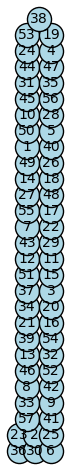

In [2]:
draw_tree_from_prufer([25,41,2,57,23,57,9,42,52,32,54,16,20,3,15,11,29,22,17,48,18,26,40,5,28,56,35,47,4,19,38,53,24,44,31,45,10,50,1,49,14,27,55,7,43,12,51,37,34,21,39,13,46,8,33])